In [33]:
import numpy as np
import sympy as sp
import scipy
import matplotlib.pyplot as plt

## Major Formulae for flat face Cam follower
1. $r_b \ge \rho_\text{min} - \left[y\left(\theta\right) + {y}"\left(\theta\right) \right]_\text{min},\, \theta \in \left[0, \theta_{r_i}\right]$
2. $e \ge \left[y'\left(\theta\right)\right]_\text{max} - \epsilon_\text{max}, \, \theta \in \left[0, \theta_{r_i}\right]$
3. $w_\text{follower, min} = y'(\theta)_\text{max} + \left|y'(\theta)_\text{min}\right|$

# PArt 1

In [ ]:
THETA_RI1 = 110*np.pi/180
THETA_RI2 = 60*np.pi/180
THETA_D = 10*np.pi/180
L1 = 40
L2 = 20
OMEGA = 3*2*np.pi/60  # rad/s

In [35]:
t = sp.symbols("t")
theta = sp.Function("theta")(t)
y_r1 = sp.Function("y")(theta)
y_f = sp.Function("y")(theta)

y_r1 = L1* ( 6*(theta/THETA_RI1)**5 -15*(theta/THETA_RI1)**4 +10*(theta/THETA_RI1)**3)
y_r2 = L1 + L2*(((theta-(THETA_RI1+THETA_D))/THETA_RI2)-sp.sin(2*np.pi*(theta-(THETA_RI1+THETA_D))/THETA_RI2)/(2*np.pi))
# y rising 1
# y rising 2
y_u = sp.Piecewise(
    (y_r1, (theta >= 0) & (theta <= THETA_RI1)),
    (L1, (theta > THETA_RI1) & (theta <= (THETA_RI1 + THETA_D))),
    (y_r2, (theta > (THETA_RI1 + THETA_D)) & (theta <= (THETA_RI1 + THETA_D + THETA_RI2)))
)
# y upwards = y in the entire code

In [36]:
y_u

Piecewise((5.9554992394648*theta(t)**5 - 31.1829210986037*theta(t)**4 + 43.5395714848193*theta(t)**3, (theta(t) <= 2.0943951023932) & (theta(t) >= 0)), (40, (theta(t) <= 2.26892802759263) & (theta(t) > 2.0943951023932)), (22.9183118052329*theta(t) - 3.18309886183791*sin(7.2*theta(t) - 16.3362817986669) - 12.0, (theta(t) <= 3.14159265358979) & (theta(t) > 2.26892802759263)))

In [37]:
dashy = sp.diff(y_u, theta)
ddashy = sp.diff(dashy, theta)

y_lambda = sp.lambdify(
    expr=y_u,
    args=theta,
    modules='numpy')

dashy_lambda = sp.lambdify(
    expr=dashy,
    args=theta,
    modules='numpy')

ddashy_lambda = sp.lambdify(
    expr=ddashy,
    args=theta,
    modules='numpy')

max theta: 3.141592653589793, min theta: 0.0
max yu: 59.99368887533001, min yu: 0.0


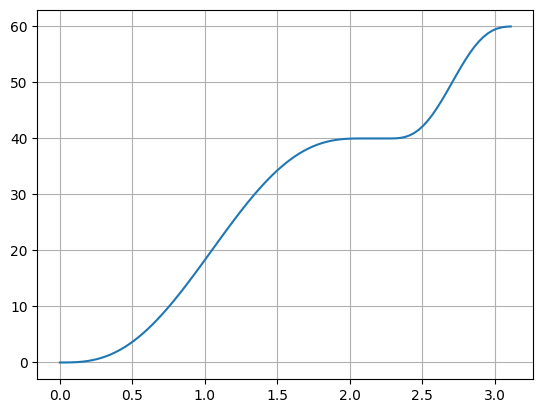

In [38]:
theta_vals = np.linspace(0, np.pi, 100)
y_vals = y_lambda(theta_vals)
plt.plot(theta_vals, y_vals)
plt.grid()
print(f"max theta: {max(theta_vals)}, min theta: {min(theta_vals)}")
print(f"max yu: {max(y_vals)}, min yu: {min(y_vals)}")

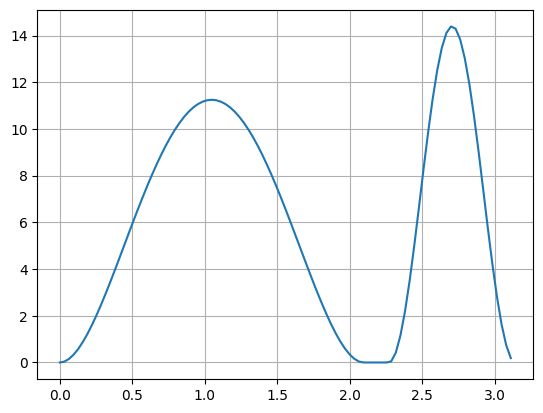

In [39]:
doty = sp.diff(y_u, t).subs({sp.diff(theta, t): OMEGA}).evalf()
doty_lambda = sp.lambdify(
    expr = doty,
    args = theta,
    modules = 'numpy')
plt.plot(theta_vals, doty_lambda(theta_vals))
plt.grid()

In [67]:
doty_max = scipy.optimize.minimize(
    sp.lambdify(
        expr=-doty,
        args=theta,
        modules='numpy'),
    x0 = 1,
    bounds = [(0, THETA_RI1 + THETA_D + THETA_RI2)]
)
doty_max

  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: -11.249999999999986
        x: [ 1.047e+00]
      nit: 3
      jac: [ 7.105e-07]
     nfev: 12
     njev: 6
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

## b,c
Max vel = 16.3636
theta = 0.9599

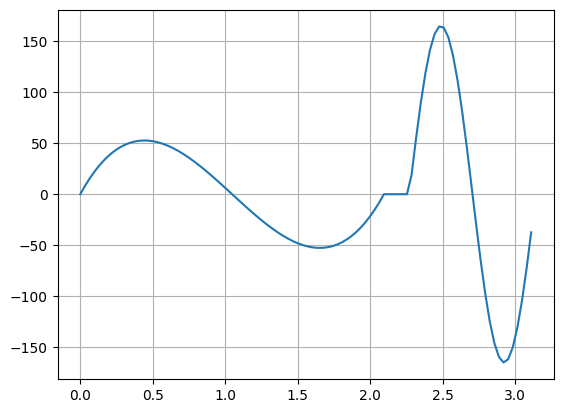

In [41]:
ddashy_lambda = sp.lambdify(
    expr=ddashy,
    args=theta,
    modules='numpy')
plt.plot(theta_vals, ddashy_lambda(theta_vals))
plt.grid()

In [42]:
ddashy_max = scipy.optimize.minimize(
    sp.lambdify(
        expr = -ddashy,
        args = theta,
        modules = 'numpy'),
    x0 = 2.5,
    bounds = [(0, THETA_RI1 + THETA_D + THETA_RI2)]
)
ddashy_max

  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: -165.0118449976769
        x: [ 2.487e+00]
      nit: 3
      jac: [ 0.000e+00]
     nfev: 14
     njev: 7
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

## d, e
max d2y/dtheta2 = 114.5915
at theta = 2.356

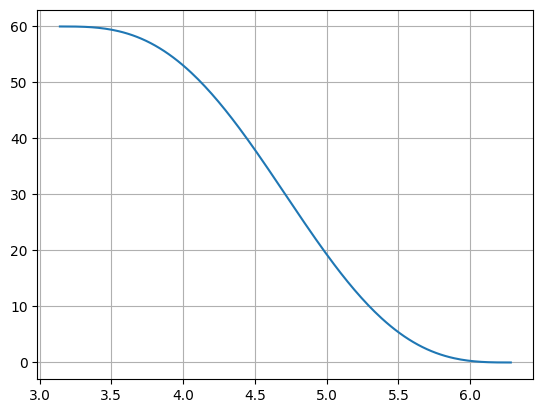

In [43]:
y_d = sp.Function("y_d")(theta)
# Defining the downward motion
THETA_RE = 2*np.pi - (THETA_RI1 + THETA_D + THETA_RI2)
y_d = (L1 + L2)*(((2*np.pi-theta)/THETA_RE)-sp.sin(2*np.pi*(2*np.pi-theta)/THETA_RE)/(2*np.pi))

yd_lambda = sp.lambdify(
    expr=y_d,
    args=theta,
    modules='numpy')
theta_vals3 = np.linspace(np.pi, 2*np.pi, 200)
plt.plot(theta_vals3, yd_lambda(theta_vals3))
plt.grid()

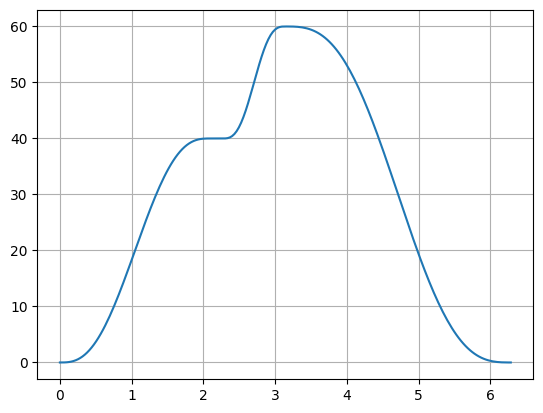

In [44]:
y_rf = sp.Piecewise(
    (y_u, theta <= (THETA_RI1 + THETA_D + THETA_RI2)),
    (y_d, theta > (THETA_RI1 + THETA_D + THETA_RI2))
)
yrf_lambda = sp.lambdify(
    expr=y_rf,
    args=theta,
    modules='numpy')
theta_vals2 = np.linspace(0, 2*np.pi, 200)
plt.plot(theta_vals2, yrf_lambda(theta_vals2))
plt.grid()
# Total y function denoted by yrf y rise fall

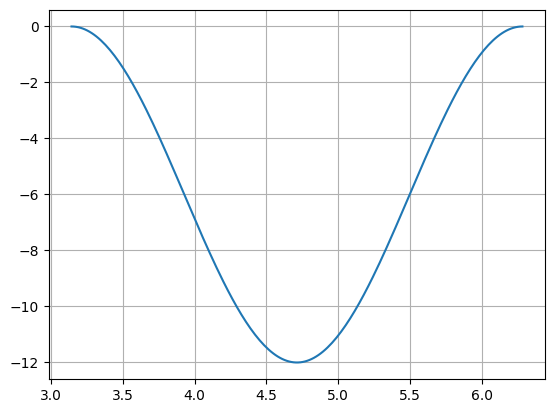

In [45]:
doty_yd = sp.diff(y_d, t).subs({sp.diff(theta, t): OMEGA}).evalf()
doty_yd_lambda = sp.lambdify(
    expr = doty_yd,
    args = theta,
    modules = 'numpy')
plt.plot(theta_vals3, doty_yd_lambda(theta_vals3))
plt.grid()

In [46]:
dotyd_min = scipy.optimize.minimize(
    sp.lambdify(
        expr = doty_yd,
        args = theta,
        modules = 'numpy'),
    x0 = 4.8,
    bounds = [(THETA_RI1 + THETA_D + THETA_RI2, 2*np.pi)]
)
dotyd_min

  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: -11.999999999999996
        x: [ 4.712e+00]
      nit: 3
      jac: [ 5.329e-07]
     nfev: 10
     njev: 5
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

## f
max down vel is 16mm.sec

In [47]:
yddashy_min = scipy.optimize.minimize(
    sp.lambdify(expr = y_u + ddashy, 
                args=theta,
                modules='numpy'),
    x0=3,
    bounds=[(0, THETA_RI1+THETA_D+THETA_RI2)])


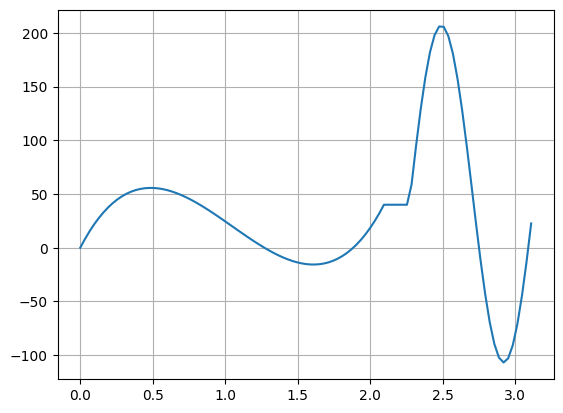

In [48]:
plt.plot(theta_vals,         
            sp.lambdify(
                expr=y_u + ddashy,
                args=theta,
                modules='numpy')
            (theta_vals))
plt.grid()

In [49]:
yddashy_min = scipy.optimize.minimize(
    sp.lambdify(expr=y_u + ddashy,
                args=theta,
                modules='numpy'),
    x0=3,
    bounds=[(0, THETA_RI1+THETA_D+THETA_RI2)])
yddashy_min

  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: -106.86005220881164
        x: [ 2.921e+00]
      nit: 3
      jac: [-7.105e-06]
     nfev: 14
     njev: 7
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

In [50]:
rb = 150
rb+yddashy_min.fun # minimum radius of curvature

43.13994779118836

# g
min roc = 93.546 mm

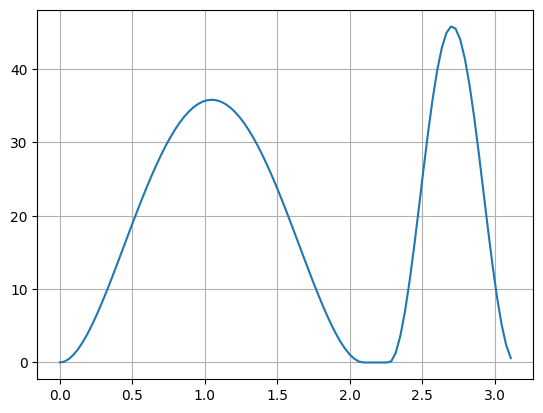

In [51]:
plt.plot(theta_vals,     sp.lambdify(expr=dashy,
                                     args=theta,
                                     modules='numpy')(theta_vals))
plt.grid()
# theta_vals implies while rising

In [52]:
dashy_max = scipy.optimize.minimize(
    sp.lambdify(expr = -dashy,
                args = theta,
                modules = 'numpy'),
    x0 = 1,
    bounds = [(0, THETA_RI1+THETA_D+THETA_RI2)])
dashy_max
# getting ydash max

  message: ABNORMAL: 
  success: False
   status: 2
      fun: nan
        x: [ 1.000e+00]
      nit: 0
      jac: [-6.152e+00]
     nfev: 4
     njev: 2
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

In [53]:
dashy_max_val = -dashy_max.fun

In [54]:
Max_eccen = 30
e_min = dashy_max_val - Max_eccen

In [55]:
e_min

nan

# h
9.0653

In [56]:
dashy_max_val

nan

# PArt 3

In [57]:
e = 0
r_p = 170
pres_ang = sp.atan((dashy-e)/(y_u+sp.sqrt(r_p**2 - e**2)))

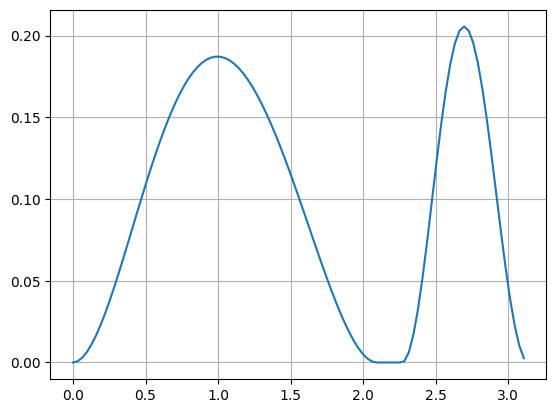

In [58]:
pres_ang_lambda = sp.lambdify(
    expr = pres_ang,
    args = theta,
    modules = 'numpy') 
plt.plot(theta_vals, pres_ang_lambda(theta_vals))
plt.grid()

In [59]:
scipy.optimize.minimize(
    sp.lambdify(
    expr = -pres_ang,
    args = theta,
    modules = 'numpy'),
    x0 = 1,
    bounds = [(0, THETA_RI1 + THETA_D + THETA_RI2)])

  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: -0.18718068927609485
        x: [ 9.954e-01]
      nit: 2
      jac: [-1.127e-06]
     nfev: 6
     njev: 3
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

# i
Max pressure angle at theta = 0.9125
max pres angle = .2037

max distance of trace point
 = sqrt (maxY**2+ maxX **2)

In [60]:
Y = y_u + sp.sqrt(r_p**2 - e**2)
X = e # X = 0
R = sp.sqrt(Y**2 + X**2)

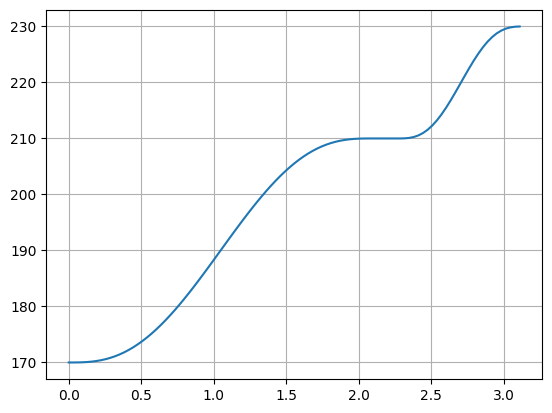

In [61]:
plt.plot(theta_vals, sp.lambdify(
    expr = Y,args = theta, modules = 'numpy')(theta_vals))
plt.grid()

In [62]:
R_max = scipy.optimize.minimize(
    sp.lambdify(
    expr=-R,
    args=theta,
    modules='numpy'),
    x0 = 3.14,
    bounds = [(0, THETA_RI1 + THETA_D + THETA_RI2)])
R_max

  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: -229.99999999988472
        x: [ 3.142e+00]
      nit: 1
      jac: [-5.684e-06]
     nfev: 4
     njev: 2
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

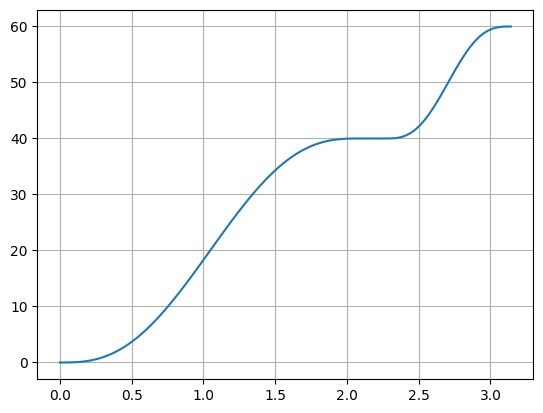

In [63]:
plt.plot(theta_vals, sp.lambdify(
    expr = y_rf,
    args = theta,
    modules = 'numpy'
)(theta_vals))
plt.grid()

# Q1a

In [64]:
THETA_D/OMEGA

0.5555555555555556